In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from linregress import linearly_regress
from linregress import model_averages

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
df.dropna(inplace=True)

In [4]:
df.replace({'NO': 0, 'YES': 1}, inplace = True)

In [5]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [6]:
df.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace= True)

In [7]:
df['yr_renovated'].mask(df['yr_renovated'] == 0, df['yr_built'], inplace = True)


In [8]:
df.drop(columns = ['yr_built', 'bedrooms', 'bathrooms', 'sqft_above'], inplace = True)

In [9]:
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [10]:
numeric_df = df.drop(columns = ['id', 'date', 'sqft_lot15', 'sqft_living15', 'sqft_lot'])

In [11]:
numeric_df.replace({'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}, inplace = True)

In [12]:
numeric_df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [13]:
numeric_df.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace = True)

In [14]:
numeric_df.drop(columns = 'sqft_basement', inplace = True)

In [15]:
numeric_df.corr()

price  sqft_living    floors  waterfront      view  \
price         1.000000     0.706189  0.259505    0.274212  0.396862   
sqft_living   0.706189     1.000000  0.359407    0.111491  0.285506   
floors        0.259505     0.359407  1.000000    0.018382  0.027518   
waterfront    0.274212     0.111491  0.018382    1.000000  0.409773   
view          0.396862     0.285506  0.027518    0.409773  1.000000   
condition     0.034367    -0.062319 -0.261013    0.016454  0.046354   
grade         0.664146     0.764251  0.459843    0.083034  0.248679   
yr_renovated  0.100023     0.338318  0.499460   -0.001108 -0.023260   
zipcode      -0.049502    -0.196537 -0.058130    0.030391  0.086479   
lat           0.306607     0.058394  0.058190   -0.015935  0.008403   
long          0.021215     0.239521  0.129769   -0.042324 -0.078500   

              condition     grade  yr_renovated   zipcode       lat      long  
price          0.034367  0.664146      0.100023 -0.049502  0.306607  0.021215  
sqft_living   -0.062319  0.764251      0.338318 -0.196537  0.058394  0.239521  
floors        -0.261013  0.459843      0.499460 -0.058130  0.058190  0.129769  
waterfront     0.016454  0.083034     -0.001108  0.030391 -0.015935 -0.042324  
view           0.046354  0.248679     -0.023260  0.086479  0.008403 -0.078500  
condition      1.000000 -0.147810     -0.401191  0.001685 -0.022250 -0.105823  
grade         -0.147810  1.000000      0.456067 -0.184120  0.117425  0.200680  
yr_renovated  -0.401191  0.456067      1.000000 -0.316609 -0.130761  0.380645  
zipcode        0.001685 -0.184120     -0.316609  1.000000  0.267763 -0.562154  
lat           -0.022250  0.117425     -0.130761  0.267763  1.000000 -0.133840  
long          -0.105823  0.200680      0.380645 -0.562154 -0.133840  1.000000

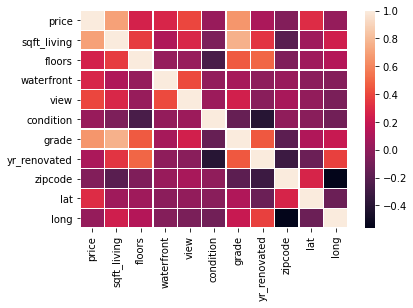

In [16]:
import seaborn as sns
sns.heatmap(numeric_df.corr(), linewidth = 0.5);

In [17]:
# from sklearn import preprocessing

# standardized_data = preprocessing.scale(numeric_df)

# df_standard = pd.DataFrame(standardized_data, columns = numeric_df.columns)

In [18]:
# import statsmodels.api as sm

# y= df_standard['price']
# X = sm.add_constant(df_standard.drop(columns = ['price', 'floors']))

# model = sm.OLS(y, X).fit()

# model.summary()

In [19]:
# def linearly_regress(y, X):
#     lr = LinearRegression()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     lr.fit(X_train, y_train)
#     r_squared = lr.score(X_train, y_train)

#     y_pred = lr.predict(X_test)
#     MAE = mean_absolute_error(y_pred, y_test)
#     RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
    
#     return (lr, r_squared, MAE, RMSE)



In [20]:
X = numeric_df.drop(columns = ['price', 'floors', 'condition'])
y= numeric_df['price']

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.6834754690765047, 133527.7031085274, 217652.13942524305)


Our model is trash!

In [21]:
outlier_dropped_df = numeric_df[numeric_df['price'] < numeric_df['price'].quantile(0.95)]


In [22]:
outlier_dropped_df.shape

(14970, 11)

In [23]:
y= outlier_dropped_df['price']
X = outlier_dropped_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.6691923464678509, 90944.17451049508, 119764.8377859911)


In [24]:
log_scaled_df = numeric_df.copy()

log_scaled_df['price'] = np.log(numeric_df['price'])
log_scaled_df['sqft_living'] = np.log(numeric_df['sqft_living'])

log_scaled_df

price  sqft_living  floors  waterfront  view  condition  grade  \
1      13.195614     7.851661     2.0           0     0          2      7   
3      13.311329     7.580700     1.0           0     0          4      7   
4      13.142166     7.426549     1.0           0     0          2      8   
5      14.022525     8.597851     1.0           0     0          2     11   
6      12.458775     7.447168     2.0           0     0          2      7   
...          ...          ...     ...         ...   ...        ...    ...   
21591  13.071070     7.177782     2.0           0     0          2      8   
21592  12.793859     7.333023     3.0           0     0          2      8   
21593  12.899220     7.745003     2.0           0     0          2      8   
21594  12.904459     6.927558     2.0           0     0          2      7   
21596  12.691580     6.927558     2.0           0     0          2      7   

       yr_renovated  zipcode      lat     long  
1            1991.0    98125  47.7210 -122.319  
3            1965.0    98136  47.5208 -122.393  
4            1987.0    98074  47.6168 -122.045  
5            2001.0    98053  47.6561 -122.005  
6            1995.0    98003  47.3097 -122.327  
...             ...      ...      ...      ...  
21591        2008.0    98116  47.5773 -122.409  
21592        2009.0    98103  47.6993 -122.346  
21593        2014.0    98146  47.5107 -122.362  
21594        2009.0    98144  47.5944 -122.299  
21596        2008.0    98144  47.5941 -122.299  

[15762 rows x 11 columns]

In [25]:
y= log_scaled_df['price']
X = log_scaled_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.7481288943149759, 0.20591442152724007, 0.26653272100173453)


In [26]:
good_df = log_scaled_df[log_scaled_df['condition'] >= 2]
bad_df = log_scaled_df[log_scaled_df['condition'] < 2]


In [27]:
y_good = good_df['price']
X_good = good_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y_good, X_good)

In [28]:
results

(LinearRegression(),
 0.7492289214818688,
 0.20228838194132795,
 0.2593257741170005)

In [29]:
y_bad = bad_df['price']
X_bad = bad_df.drop(columns = ['price', 'floors', 'condition'])

y_pred = results[0].predict(X_bad)

In [30]:
y_difs = y_pred - y_bad

In [31]:
y_difs.sort_values(ascending = False)

16879    1.138900
5522     1.040223
12294    0.979206
10573    0.893999
8716     0.784686
           ...   
4081    -0.625993
18228   -0.666959
10416   -0.750981
18861   -0.909135
8614    -1.080385
Name: price, Length: 150, dtype: float64

Lets create 100 models and get the averages over them for a more accurate result

In [32]:
results = model_averages(y_good, X_good, y_bad, X_bad, 100)

results_df = results[0]
print(results[1])

0.2045462620071854


In [33]:
results_df['price'] = np.exp(results_df['price'])
results_df['averages'] = np.exp(results_df['averages'])

In [34]:
results_difs = results_df['averages'] - results_df['price']

In [35]:
final_df = numeric_df[numeric_df['condition'] < 2].copy()

In [36]:
final_df

price  sqft_living  floors  waterfront  view  condition  grade  \
36     550000.0         1660     1.0           0     0          0      5   
38     240000.0         1220     1.0           0     0          1      7   
242    455000.0         1430     1.5           0     0          1      7   
328    186375.0         1000     1.0           0     0          1      7   
380    270000.0         1380     1.0           0     0          0      6   
...         ...          ...     ...         ...   ...        ...    ...   
19219  200000.0          960     1.0           0     0          1      6   
19284  174900.0         1100     1.5           0     0          1      6   
19348  290000.0         2340     2.0           0     0          1      8   
19433  450000.0         1350     1.0           0     0          1      6   
19496  246500.0          940     1.0           0     0          1      7   

       yr_renovated  zipcode      lat     long  
36           1933.0    98052  47.6621 -122.132  
38           1969.0    98001  47.3341 -122.282  
242          1925.0    98115  47.6727 -122.299  
328          1952.0    98166  47.4720 -122.344  
380          1954.0    98011  47.7461 -122.195  
...             ...      ...      ...      ...  
19219        1933.0    98024  47.5621 -121.862  
19284        1926.0    98108  47.5279 -122.318  
19348        1978.0    98042  47.3468 -122.091  
19433        1946.0    98055  47.4657 -122.198  
19496        1954.0    98148  47.4631 -122.329  

[150 rows x 11 columns]

In [37]:
results_difs

36      -209038.146709
38        14231.827162
242       15721.822404
328       83691.048993
380      141613.432046
             ...      
19219     69042.948973
19284    106589.671112
19348     97597.582558
19433   -176116.419043
19496     14352.156008
Length: 150, dtype: float64

In [38]:
final_df['pred_price'] = results_difs
final_df['estimated_cost'] = final_df['sqft_living'] * 15


In [39]:
final_df['estimated_profit'] = final_df['pred_price'] - final_df['estimated_cost'] - final_df['price']

In [40]:
final_df.sort_values('estimated_profit', ascending = False)

price  sqft_living  floors  waterfront  view  condition  grade  \
16879   125000.0         1230     1.5           0     0          0      6   
12294   196000.0         1510     1.0           0     0          0      7   
5522    119500.0         1170     1.0           0     0          1      6   
10573    95000.0         1070     1.0           0     0          1      6   
8716    155000.0         1250     1.0           0     0          1      7   
...          ...          ...     ...         ...   ...        ...    ...   
8907    740000.0         1380     1.0           0     0          1      7   
1600    800000.0         2350     1.0           0     1          1      7   
10416  1200000.0         2480     1.0           0     0          1      7   
18861  1500000.0         1910     1.0           0     0          0      8   
11213  2560000.0         5300     2.0           1     2          1     10   

       yr_renovated  zipcode      lat     long     pred_price  estimated_cost  \
16879        1916.0    98117  47.6941 -122.365  259806.609643           18450   
12294        1966.0    98028  47.7758 -122.238  320231.150322           22650   
5522         1980.0    98019  47.7346 -121.983  215309.172868           17550   
10573        1948.0    98058  47.4338 -122.183  134831.590070           16050   
8716         1949.0    98108  47.5292 -122.323  181774.589056           18750   
...             ...      ...      ...      ...            ...             ...   
8907         1950.0    98115  47.6841 -122.293 -299194.649618           20700   
1600         1952.0    98040  47.5743 -122.238 -261994.066394           35250   
10416        1955.0    98052  47.6759 -122.114 -630176.447220           37200   
18861        1955.0    98004  47.6453 -122.214 -889999.622815           28650   
11213        1923.0    98105  47.6610 -122.269  119672.939547           79500   

       estimated_profit  
16879      1.163566e+05  
12294      1.015812e+05  
5522       7.825917e+04  
10573      2.378159e+04  
8716       8.024589e+03  
...                 ...  
8907      -1.059895e+06  
1600      -1.097244e+06  
10416     -1.867376e+06  
18861     -2.418650e+06  
11213     -2.519827e+06  

[150 rows x 14 columns]

In [41]:
profitable_df = final_df.loc[final_df['estimated_profit'] > 0]

In [42]:
profitable_df

price  sqft_living  floors  waterfront  view  condition  grade  \
5522   119500.0         1170     1.0           0     0          1      6   
8716   155000.0         1250     1.0           0     0          1      7   
10573   95000.0         1070     1.0           0     0          1      6   
12294  196000.0         1510     1.0           0     0          0      7   
16879  125000.0         1230     1.5           0     0          0      6   

       yr_renovated  zipcode      lat     long     pred_price  estimated_cost  \
5522         1980.0    98019  47.7346 -121.983  215309.172868           17550   
8716         1949.0    98108  47.5292 -122.323  181774.589056           18750   
10573        1948.0    98058  47.4338 -122.183  134831.590070           16050   
12294        1966.0    98028  47.7758 -122.238  320231.150322           22650   
16879        1916.0    98117  47.6941 -122.365  259806.609643           18450   

       estimated_profit  
5522       78259.172868  
8716        8024.589056  
10573      23781.590070  
12294     101581.150322  
16879     116356.609643